In [1]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from scipy.optimize import least_squares



In [ ]:
plt.plot(log_price)

In [46]:
log_return = np.log(1 + price.pct_change())

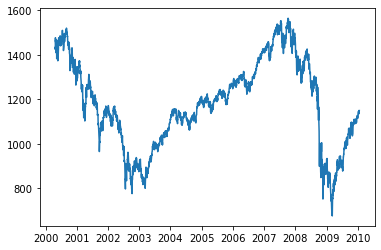

In [49]:
plt.plot(price)

In [47]:
def plt_log_return(window_size):
    return plt.plot(log_return.rolling(window_size).mean())
interact(plt_log_return,window_size=widgets.IntSlider(min=1, max=500, step=1, value=10))

interactive(children=(IntSlider(value=10, description='window_size', max=500, min=1), Output()), _dom_classes=…

<function __main__.plt_log_return(window_size)>

In [48]:
def plt_log_return(window_size):
    return  plt.plot(log_return.rolling(window_size).std())
interact(plt_log_return,window_size=widgets.IntSlider(min=1, max=100, step=1, value=10))

interactive(children=(IntSlider(value=10, description='window_size', min=1), Output()), _dom_classes=('widget-…

<function __main__.plt_log_return(window_size)>

In [ ]:
log_price = np.log(price)
plt.plot(log_price)

In [ ]:
t2 = '1988-01-19'

short_dt = range(30,90)
medium_dt = range(91,300)
short_dt = range(301,750)

short_alpha = 0.980
medium_alpha = 0.995
long_alpha = 0.998

In [2]:
def LPPL(t,A, B, C, beta, omega, phi, tc):

    f = (tc-t)**beta
    g = f*np.cos(omega*np.log(tc-t)+phi)
    return A + B*f + C*g



In [3]:
def fit_ABC(beta, omega, phi, tc, log_price):
    t = np.arange(1,len(log_price)+1)
    f = (tc-t)**beta
    g = f*np.cos(omega*np.log(tc-t)+phi)

    X = np.array([np.ones(len(log_price)),f,g]).T
    A, B, C = np.linalg.solve(X.T@X,X.T@log_price)
    return A, B, C

In [4]:
def f_min( beta, omega, phi, tc, log_price):

    t = np.arange(1,len(log_price)+1)
    A, B, C = fit_ABC(beta, omega, phi, tc, log_price)

    return LPPL(t, A, B, C, beta, omega, phi, tc) - log_price

In [5]:
def fit_LPPL(log_price, beta_0=0.5, omega_0 = 9, phi_0 = np.pi,
 beta_m = 0.000001, omega_m = 1, phi_m = 0.00001,
 beta_M = 2, omega_M = 21, phi_M = 2*np.pi):

    tc_0 = len(log_price) + 15
    tc_m = len(log_price) + 1
    tc_M = len(log_price) + 10000

    return least_squares(
        lambda x: f_min(beta=x[0], omega=x[1], phi=x[2], tc=x[3], log_price=log_price),
        np.array([beta_0, omega_0, phi_0, tc_0]),
        bounds = ([beta_m, omega_m, phi_m, tc_m], [beta_M, omega_M, phi_M, tc_M])
    )

In [9]:
def conditions_satisfied(beta, omega, phi, B, C, tc, dt):
    c1 = 0.01 < beta < 1.2
    print(beta, c1)
    c2 = 2 < omega < 25
    print(omega, c2)
    c3 = 0.95*dt < tc < 1.11*dt
    print(tf,tc,c3)
    c4 = 2.5 < omega/(2)*np.log(abs((tc-(tf-dt))/(tc-dt)))
    print(omega/2*np.log(abs(tc/(tc-dt))), c4) 
    c5 = 0.8 < beta * abs(B) / (omega * abs(C))
    print(c5)
    return c1 and c2 and c3 and c4 and c5 

In [34]:
def LPPL_confidence_ts(log_price, t2, time_window):
    
    LPPL_confidence_ts = []
    for tf in t2:
        LPPL_confidence = 0
        for dt in time_window:
            dt = round(dt)
            log_price_current = log_price[tf-dt:tf]
            sol = fit_LPPL(log_price_current)
            if sol.success:
                beta, omega, phi, tc = sol.x
                A, B, C = fit_ABC(beta, omega, phi, tc, log_price_current)
                if conditions_satisfied(beta, omega, phi, B, C, tc, dt):
                    LPPL_confidence += 1
        LPPL_confidence /= len(time_window)
        LPPL_confidence_ts.append(LPPL_confidence)
    return LPPL_confidence_ts

In [38]:
short_dt = range(30,35)
medium_dt = range(91,300)
long_dt = range(301,750)

price = pd.read_csv("data.csv")["Closing Price (USD)"]
log_price = np.log(price)

LPPL_conf_ts = LPPL_confidence_ts(log_price, t2=range(800,2500), time_window=np.linspace(750,150,4))

627 True
7.983032412892881 True
2499 172.141778963957 False
8.186009629042704 True
False
2.176898637378363e-05 False
6.556815543328274 True
2499 2022.317671555353 False
1.519227407224908 False
False
1.9999999999998717 False
8.603667646337474 True
2499 551.0000000000842 True
27.152034284523744 True
False
1.111196732303581e-06 False
9.91176589221 True
2499 352.5610811479572 True
24.406704551956533 True
False
0.26995407878239686 True
7.9799687171986955 True
2499 171.5426750402307 False
8.278404450169017 True
False
2.0554882295182335e-05 False
6.660113824377418 True
2499 2024.5446631150444 False
1.5410032493363666 False
False
1.9999999999999998 False
8.60236789749422 True
2499 551.0000000000001 True
27.147932449876432 True
False
0.01067368199933567 True
9.913132357764455 True
2499 351.42444903387747 True
27.30180567398184 True
False
0.30574942763404955 True
7.976754800622409 True
2499 170.94637048740987 False
8.373137692358178 True
False
4.0684917089727895e-05 False
6.919616145202507 True


KeyboardInterrupt: 

In [ ]:
np.linspace(750,150,4)

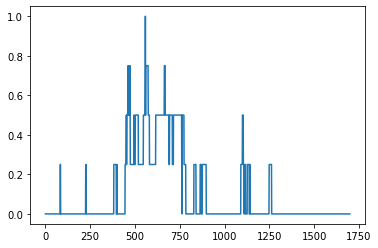

In [23]:
plt.plot(LPPL_confidence_ts)

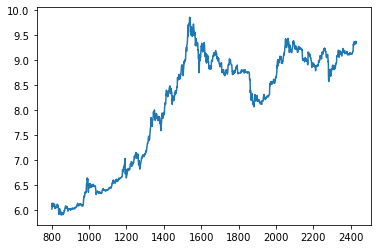

In [26]:
plt.plot(log_price[800:-1])

In [50]:
# Define the instruments to download. We would like to see Apple, Microsoft and the S&P500 index.
ticker = '^GSPC'

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2013-04-19'
end_date = '2019-01-19'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader(ticker, 'yahoo', start_date, end_date)
price = panel_data['Adj Close']
log_price = np.log(price)

LPPL_conf_ts = LPPL_confidence_ts(log_price, t2=range(800,2500), time_window=np.linspace(750,150,4))
plt.plot(LPPL_conf_ts)

08452925 True
False
1.018827520598504e-06 False
7.5490156890422755 True
2499 75.0388598088419 False
0.00391137777162565 True
False
1.9999999999945541 False
8.787740251125154 True
2499 648.0000000000006 False
8.123905051030931 True
True
1.9999999999999998 False
8.38040564626505 True
2499 476.62001778708077 False
7.840156043700381 True
False
1.013242514927022e-06 False
9.113847205390444 True
2499 254.16237781938895 False
4.444449713496607 True
False
1.3663513172464905e-06 False
7.9621558836487045 True
2499 74.59142414975132 False
-0.043375690559338216 True
False
1.9999999999999314 False
8.786048844316632 True
2499 647.0000000000001 False
8.07269770503045 True
True
1.9999999999999998 False
8.383197496017907 True
2499 475.3475042621134 False
7.759496691900609 True
False
1.0099335253272698e-06 False
9.094529772413244 True
2499 252.75411780664103 False
4.343431512546212 True
False
1.0100238549374541e-06 False
8.55573172785317 True
2499 75.1201125366257 False
0.013702020254624523 True
False
1

LinAlgError: Singular matrix

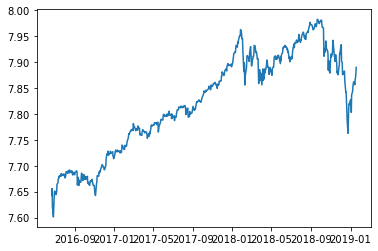

In [51]:
plt.plot(log_price[800:2500])